In [18]:
from scipy import stats as st
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.figure_factory as ff

In [19]:
survey_raw = pd.read_csv("Raw_survey_data.csv")
survey_raw["dummy"] = [1]*1600
survey_raw = survey_raw.rename(columns = {'q4':'LOIF','q5':'LOIM','q8':'LOIT','q17':'House_Status','q18':'Household_Status','q19':'Grocery_Budget_Strictness','Age_Catagory' : 'Age_Category'},errors="raise")
cNames = list(survey_raw.columns.values)
checkList = ['Prefecture_code','TypeOfRes','Sex','Age','Age_Catagory','Sex_Era','Married','Profession','House_Status','Household_Status','Grocery_Budget_Strictness']
cur_pivot = survey_raw.pivot_table("dummy",index = "LOIM",columns = 'Grocery_Budget_Strictness',aggfunc = sum)
cur_pivot = cur_pivot.fillna(0)


Text(0, 0.5, 'Population(Person)')

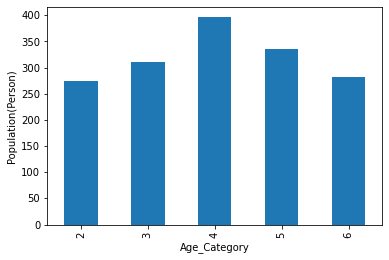

In [29]:
su = survey_raw.groupby("Age_Category").count()
du = su["dummy"]
pl = du.plot(kind="bar")
pl.set_ylabel("Population(Person)")

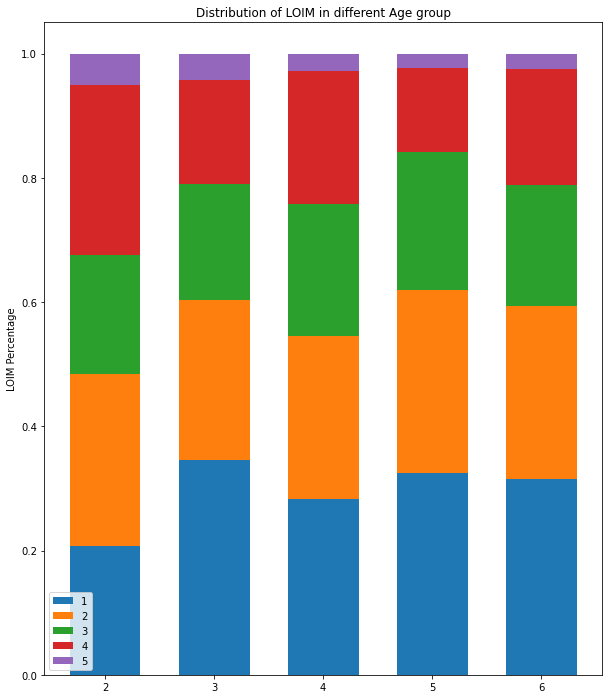

In [4]:
#------------------------------------------------------------------------#
#Anova on Age_Cate frequenct                            #  
#------------------------------------------------------------------------#
Age_Catagory_LOTM = survey_raw.pivot_table("dummy",index = "LOIM",columns = "Age_Category" ,aggfunc = sum)

#Get total for each strictness level
Age_Catagory_total = survey_raw.groupby("Age_Category").sum()
total = Age_Catagory_total["dummy"]
allTypes = []
range_ = [i for i in range(1,7)]
for i in range_:
    if i != 1 and i != 4:
        allTypes.append(Age_Catagory_LOTM[i])
sta, p = st.f_oneway(*allTypes)
Age_Catagory_LOTM_freq = Age_Catagory_LOTM/total

#------Graph------#
labels = ["2","3","4","5","6"]
fig, ax = plt.subplots(figsize = (10,12))
ax.bar(labels,Age_Catagory_LOTM_freq.loc[1],width = 0.65,label = "1")
pre = 0
for i in range(2,6): 
    pre = pre+Age_Catagory_LOTM_freq.loc[i-1]
    ax.bar(labels,Age_Catagory_LOTM_freq.loc[i],width = 0.65,bottom=pre,label = str(i))
ax.set_ylabel("LOIM Percentage")
ax.set_title("Distribution of LOIM in different Age group")
ax.legend()
plt.show()



In [6]:
temp_raw = survey_raw.groupby("Sex")
female_raw = temp_raw.get_group(2)
male_raw = temp_raw.get_group(1)
female_Age_Catagory_LOTM = female_raw.pivot_table("dummy",index = "LOIM",columns = "Age_Category" ,aggfunc = sum)
male_Age_Catagory_LOTM = male_raw.pivot_table("dummy",index = "LOIM",columns = "Age_Category" ,aggfunc = sum)
female_total = female_raw.sum()
female_total = female_total["dummy"]
male_total = male_raw.sum()
male_total = male_total["dummy"]
female_Age_Catagory_LOTM_per = female_Age_Catagory_LOTM/female_total
male_Age_Catagory_LOTM_per = male_Age_Catagory_LOTM/male_total

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')
female_Age_Catagory_LOTM_per[4] 

LOIM
1    0.061617
2    0.066752
3    0.051348
4    0.057766
5    0.008986
Name: 4, dtype: float64

In [7]:
male_Age_Catagory_LOTM_per[4] 

LOIM
1    0.077954
2    0.063337
3    0.053593
4    0.048721
5    0.004872
Name: 4, dtype: float64

In [8]:
female_Age_Catagory_LOTM_per[3] 

LOIM
1    0.064185
2    0.050064
3    0.039795
4    0.032092
5    0.006418
Name: 3, dtype: float64

In [9]:
male_Age_Catagory_LOTM_per[3] 

LOIM
1    0.069428
2    0.049939
3    0.032887
4    0.032887
5    0.009744
Name: 3, dtype: float64

In [13]:
temp_raw = survey_raw.groupby("Married")
Married_raw = temp_raw.get_group(2)
Unmarried_raw = temp_raw.get_group(1)
Married_Age_Catagory_LOTM = Married_raw.pivot_table("dummy",index = "LOIM",columns = "Age_Category" ,aggfunc = sum)
Unmarried_Age_Catagory_LOTM = Unmarried_raw.pivot_table("dummy",index = "LOIM",columns = "Age_Category" ,aggfunc = sum)
married_total = Married_raw.sum()
married_total = married_total["dummy"]
unmarried_total = Unmarried_raw.sum()
unmarried_total = unmarried_total["dummy"]
married_Age_Catagory_LOTM_per = Married_Age_Catagory_LOTM/married_total
unmarried_Age_Catagory_LOTM_per = Unmarried_Age_Catagory_LOTM/unmarried_total


 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6')]

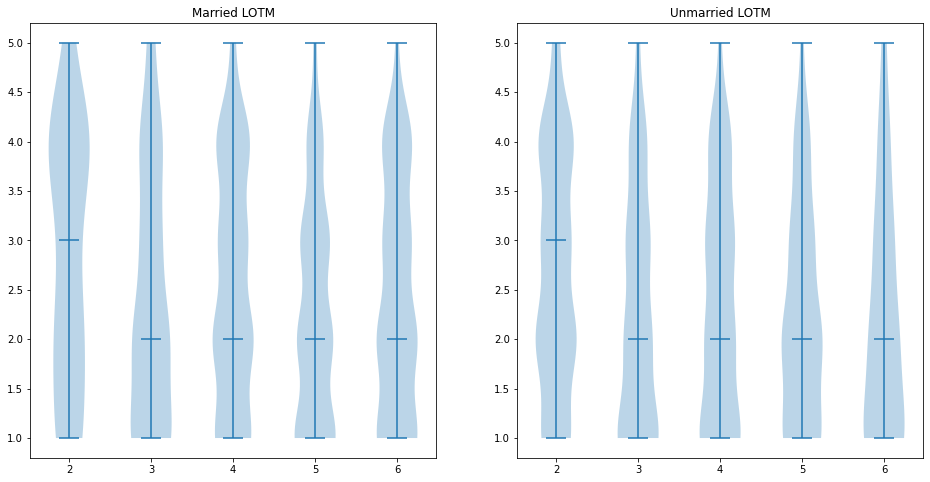

In [14]:
married_violin = []
unmarried_violin = []
cur = 1
for each in Married_Age_Catagory_LOTM:
    temp = []
    for i in Married_Age_Catagory_LOTM[each]:
        if cur == 6:
            cur = 1
        for j in range(i):
            temp.append(cur)
        cur+=1
    married_violin.append(temp)


for each in Unmarried_Age_Catagory_LOTM:
    temp = []
    for i in Unmarried_Age_Catagory_LOTM[each]:
        if cur == 6:
            cur = 1
        for j in range(i):
            temp.append(cur)
        cur+=1
    unmarried_violin.append(temp)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].violinplot(married_violin,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Married LOTM')

axs[1].violinplot(unmarried_violin,
                  showmeans=False,
                  showmedians=True)
axs[1].set_title('Unmarried LOTM')

plt.setp(axs,xticks=[y + 1 for y in range(len(married_violin))],xticklabels=['2','3', '4', '5', '6'])

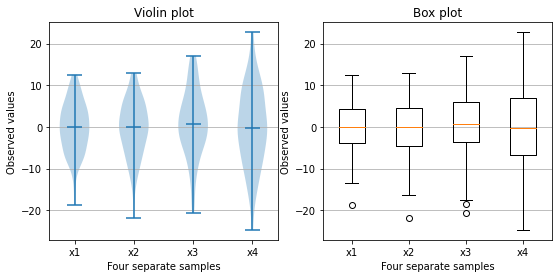

In [15]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

In [ ]:
#------------------------------------------------------------------------#
#Anova on Age_Cate frequenct                            #  
#------------------------------------------------------------------------#
Age_Catagory_LOTM = survey_raw.pivot_table("dummy",index = "LOIT",columns = "Age_Category" ,aggfunc = sum)

#Get total for each strictness level
Age_Catagory_total = survey_raw.groupby("Age_Category").sum()
total = Age_Catagory_total["dummy"]
allTypes = []
range_ = [i for i in range(1,7)]
for i in range_:
    if i != 1 and i != 4:
        allTypes.append(Age_Catagory_LOTM[i])
sta, p = st.f_oneway(*allTypes)
Age_Catagory_LOTM_freq = Age_Catagory_LOTM/total

Age_Catagory_LOTM_freq